In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
complete_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#API Base URL
url = "http://api.openweathermap.org/data/2.5/weather?q=" 

In [78]:
city_list = cities[0:600]

In [79]:
for index, city in enumerate(city_list): 
    try:
        query_url = f'{url}{city}&appid={weather_api_key}'
        response = requests.get(query_url).json()
# print(response) 
        complete_list.append({"City":response['name'],
                              "Country":response['sys']['country'],
                              "Temperature":response['main']['temp'],
                              "Humidity":response['main']['humidity'],
                              "Cloudiness":response['clouds']['all'],
                              "Wind Speed":response['wind']['speed'],
                              "Longitude":response['coord']['lon'],
                              "Latitude":response['coord']['lat']})

    except KeyError:
        print(f"City #{index+1}: {city}'s data insufficient")        
        
    if index == 300:
        print('---------------------50% Complete------------------')

City #4: taolanaro's data insufficient
City #7: kachikau's data insufficient
City #10: samusu's data insufficient
City #16: meyungs's data insufficient
City #30: nizhneyansk's data insufficient
City #33: grand river south east's data insufficient
City #39: illoqqortoormiut's data insufficient
City #66: jujuy's data insufficient
City #78: rungata's data insufficient
City #80: sentyabrskiy's data insufficient
City #83: amderma's data insufficient
City #124: mutsamudu's data insufficient
City #127: barentsburg's data insufficient
City #134: belushya guba's data insufficient
City #138: viligili's data insufficient
City #142: tsihombe's data insufficient
City #144: bossembele's data insufficient
City #161: barbar's data insufficient
City #166: attawapiskat's data insufficient
City #185: azimur's data insufficient
City #226: afmadu's data insufficient
City #227: karkaralinsk's data insufficient
City #243: mys shmidta's data insufficient
City #258: vaitupu's data insufficient
City #272: sint 

In [80]:
api_df = pd.DataFrame(complete_list)
api_df

,City,Country,Temperature,Humidity,Cloudiness,Wind Speed,Longitude,Latitude
0,Hermanus,ZA,289.26,89,96,3.20,19.2345,-34.4187
1,Rikitea,PF,299.99,79,100,8.40,-134.9692,-23.1203
2,Arraial do Cabo,BR,297.15,83,75,3.09,-42.0278,-22.9661
3,Yellowknife,CA,261.42,72,20,6.69,-114.3525,62.4560
4,Port Alfred,ZA,292.59,91,32,0.45,26.8910,-33.5906
...,...,...,...,...,...,...,...,...
2143,Kimbe,PG,297.63,79,100,1.24,150.1429,-5.5502
2144,Skibbereen,IE,278.15,87,75,2.06,-9.2667,51.5500
2145,Mgandu,TZ,290.39,97,100,2.16,34.1333,-5.9500
2146,Hāgere Hiywet,ET,288.67,36,1,3.42,37.8500,8.9833


In [6]:
query_url = f'{url}{city}&appid={weather_api_key}'
response = requests.get(query_url).json()

In [81]:
api_df = pd.DataFrame(complete_list)
api_df.dropna(how='any')

,City,Country,Temperature,Humidity,Cloudiness,Wind Speed,Longitude,Latitude
0,Hermanus,ZA,289.26,89,96,3.20,19.2345,-34.4187
1,Rikitea,PF,299.99,79,100,8.40,-134.9692,-23.1203
2,Arraial do Cabo,BR,297.15,83,75,3.09,-42.0278,-22.9661
3,Yellowknife,CA,261.42,72,20,6.69,-114.3525,62.4560
4,Port Alfred,ZA,292.59,91,32,0.45,26.8910,-33.5906
...,...,...,...,...,...,...,...,...
2143,Kimbe,PG,297.63,79,100,1.24,150.1429,-5.5502
2144,Skibbereen,IE,278.15,87,75,2.06,-9.2667,51.5500
2145,Mgandu,TZ,290.39,97,100,2.16,34.1333,-5.9500
2146,Hāgere Hiywet,ET,288.67,36,1,3.42,37.8500,8.9833


In [82]:
#fitting for 500 data points
cities_df = api_df[0:500]
cities_df

,City,Country,Temperature,Humidity,Cloudiness,Wind Speed,Longitude,Latitude
0,Hermanus,ZA,289.26,89,96,3.20,19.2345,-34.4187
1,Rikitea,PF,299.99,79,100,8.40,-134.9692,-23.1203
2,Arraial do Cabo,BR,297.15,83,75,3.09,-42.0278,-22.9661
3,Yellowknife,CA,261.42,72,20,6.69,-114.3525,62.4560
4,Port Alfred,ZA,292.59,91,32,0.45,26.8910,-33.5906
...,...,...,...,...,...,...,...,...
495,Shirokiy,RU,253.32,93,19,0.75,129.5230,49.7580
496,Chuguyevka,RU,261.73,94,87,1.01,133.8633,44.1653
497,Sijunjung,ID,294.51,91,100,0.61,100.9537,-0.6876
498,Tigil',RU,243.12,86,82,2.60,158.6667,57.8000


In [83]:
#For some reason my temperature came back in Kelvin, so I had to convert
cities_df['Temperature'] = (cities_df['Temperature'] - 273.15) * 9/5 + 32

C:\Users\Vince\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
cities_df

,City,Country,Temperature,Humidity,Cloudiness,Wind Speed,Longitude,Latitude
0,Hermanus,ZA,60.998,89,96,3.20,19.2345,-34.4187
1,Rikitea,PF,80.312,79,100,8.40,-134.9692,-23.1203
2,Arraial do Cabo,BR,75.200,83,75,3.09,-42.0278,-22.9661
3,Yellowknife,CA,10.886,72,20,6.69,-114.3525,62.4560
4,Port Alfred,ZA,66.992,91,32,0.45,26.8910,-33.5906
...,...,...,...,...,...,...,...,...
495,Shirokiy,RU,-3.694,93,19,0.75,129.5230,49.7580
496,Chuguyevka,RU,11.444,94,87,1.01,133.8633,44.1653
497,Sijunjung,ID,70.448,91,100,0.61,100.9537,-0.6876
498,Tigil',RU,-22.054,86,82,2.60,158.6667,57.8000


In [85]:
#This cell is only if the criteria was too strict and the dataframe was reduce below 500 cities after minor data munging
n = 0
while len(complete_list) <500:
    try:
        city = cities[n]
        query_url = f'{url}{city}&appid={weather_api_key}'
        response = requests.get(query_url).json()
# print(response) 
        complete_list.append({"City":response['name'],
                              "Country":response['sys']['country'],
                              "Temperature":response['main']['temp'],
                              "Humidity":response['main']['humidity'],
                              "Cloudiness":response['clouds']['all'],
                              "Wind Speed":response['wind']['speed'],
                              "Longitude":response['coord']['lon'],
                              "Latitude":response['coord']['lat']})
    except KeyError:
        print("exception")
    # Create a set of random lat and lng combinations
    if n == len(cities):
        print(f'The number of cities examied so far is {n}, fetching new citites.')

        lats = []
        lngs = []
        
        lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
        lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
        lat_lngs = zip(lats, lngs)

        for lat_lng in lat_lngs:
            city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
            
            # If the city is unique, then add it to a our cities list
            if city not in cities:
                cities.append(city)
    n = n + 1

In [86]:
northern_hem_df = cities_df[cities_df["Latitude"] <= .01 ]
southern_hem_df = cities_df[cities_df["Latitude"] >= .01 ]
northern_hem_df

,City,Country,Temperature,Humidity,Cloudiness,Wind Speed,Longitude,Latitude
0,Hermanus,ZA,60.998,89,96,3.20,19.2345,-34.4187
1,Rikitea,PF,80.312,79,100,8.40,-134.9692,-23.1203
2,Arraial do Cabo,BR,75.200,83,75,3.09,-42.0278,-22.9661
4,Port Alfred,ZA,66.992,91,32,0.45,26.8910,-33.5906
8,Arandis,NA,78.026,30,0,3.19,14.9667,-22.4167
...,...,...,...,...,...,...,...,...
479,Codrington,AU,58.280,91,100,4.47,141.9667,-38.2667
488,Victoria Point,AU,69.728,97,77,2.96,153.3000,-27.5833
491,Saldanha,ZA,62.600,67,29,2.57,17.9442,-33.0117
492,Ampanihy,MG,70.502,83,0,3.06,44.7500,-24.7000


In [87]:
ncity=northern_hem_df['City']
nlat=northern_hem_df['Latitude']           
nlng=northern_hem_df['Longitude']           
nmaxtemp=northern_hem_df["Temperature"]      
nhumidity=northern_hem_df['Humidity']      
ncloudiness=northern_hem_df['Cloudiness']    
nwindspeed=northern_hem_df['Wind Speed']    
ncountry=northern_hem_df['Country']

Text(0.5, 0, 'Latitude')

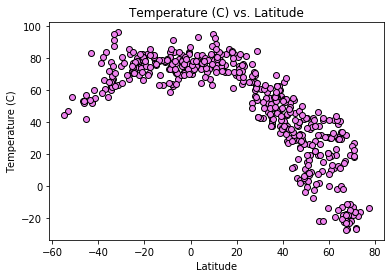

In [88]:
plt.scatter(cities_df["Latitude"],cities_df["Temperature"], marker="o", facecolors="violet", edgecolors="black")
plt.title("Temperature (C) vs. Latitude")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")

Text(0.5, 0, 'Latitude')

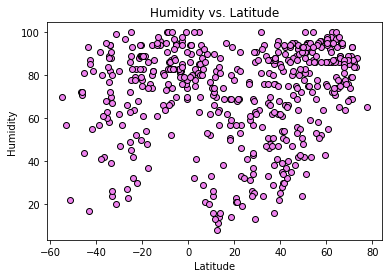

In [89]:
plt.scatter(cities_df["Latitude"],cities_df["Humidity"], marker="o", facecolors="violet", edgecolors="black")
plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

Text(0.5, 0, 'Latitude')

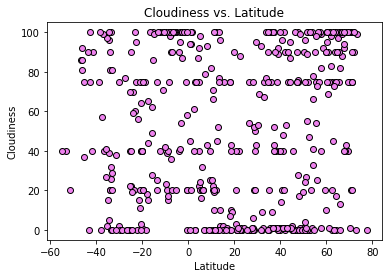

In [90]:
plt.scatter(cities_df["Latitude"],cities_df["Cloudiness"], marker="o", facecolors="violet", edgecolors="black")
plt.title("Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

Text(0.5, 0, 'Latitude')

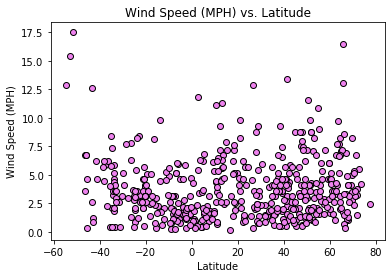

In [91]:
plt.scatter(cities_df["Latitude"],cities_df["Wind Speed"], marker="o", facecolors="violet", edgecolors="black")
plt.title("Wind Speed (MPH) vs. Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")

The r-squared value is : 0.0712982349613593


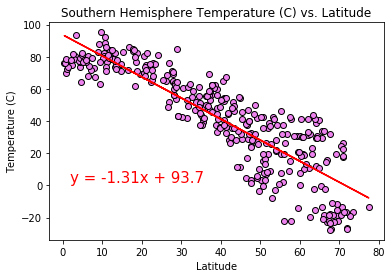

In [92]:
plt.scatter(southern_hem_df["Latitude"],southern_hem_df["Temperature"], marker="o", facecolors="violet", edgecolors="black")
plt.title("Southern Hemisphere Temperature (C) vs. Latitude")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
#
print(f"The r-squared value is : {rvalue**2}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem_df["Latitude"], southern_hem_df["Temperature"])
regress_values = southern_hem_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hem_df["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(2,2),fontsize=15,color="red")
plt.show()

The r-squared value is : 0.26833590216934494


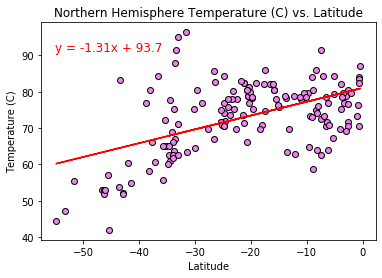

In [93]:
plt.scatter(northern_hem_df["Latitude"],northern_hem_df["Temperature"], marker="o", facecolors="violet", edgecolors="black")
plt.title("Northern Hemisphere Temperature (C) vs. Latitude")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
#
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem_df["Latitude"], northern_hem_df["Temperature"])
regress_values = northern_hem_df["Latitude"] * slope + intercept
plt.plot(northern_hem_df["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(-55,91),fontsize=12,color="red")
print(f"The r-squared value is : {rvalue**2}")

The r-squared value is : 0.1266454332193742


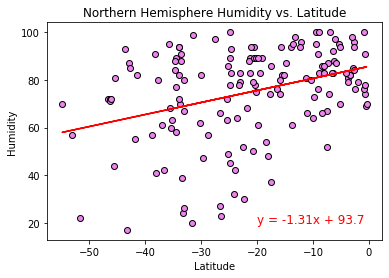

In [94]:
plt.scatter(northern_hem_df["Latitude"],northern_hem_df["Humidity"], marker="o", facecolors="violet", edgecolors="black")
plt.title("Northern Hemisphere Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem_df["Latitude"], northern_hem_df["Humidity"])
regress_values = northern_hem_df["Latitude"] * slope + intercept
plt.plot(northern_hem_df["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=12,color="red")
print(f"The r-squared value is : {rvalue**2}")

The r-squared value is : 0.09121703700871586


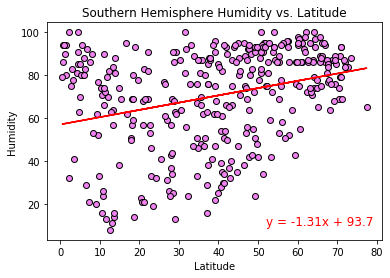

In [95]:
plt.scatter(southern_hem_df["Latitude"],southern_hem_df["Humidity"], marker="o", facecolors="violet", edgecolors="black")
plt.title("Southern Hemisphere Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem_df["Latitude"], southern_hem_df["Humidity"])
regress_values = southern_hem_df["Latitude"] * slope + intercept
plt.plot(southern_hem_df["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(52,10),fontsize=12,color="red")
print(f"The r-squared value is : {rvalue**2}")

The r-squared value is : 0.1948075535173416


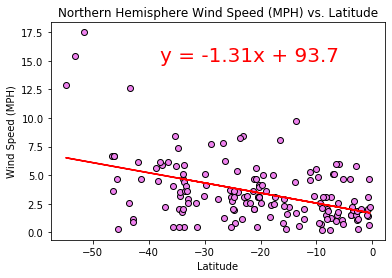

In [100]:
plt.scatter(northern_hem_df["Latitude"],northern_hem_df["Wind Speed"], marker="o", facecolors="violet", edgecolors="black")
plt.title("Northern Hemisphere Wind Speed (MPH) vs. Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem_df["Latitude"], northern_hem_df["Wind Speed"])
regress_values = northern_hem_df["Latitude"] * slope + intercept
plt.plot(northern_hem_df["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(-38,15),fontsize=20,color="red")
print(f"The r-squared value is : {rvalue**2}")

The r-squared value is : 0.007527313140657512


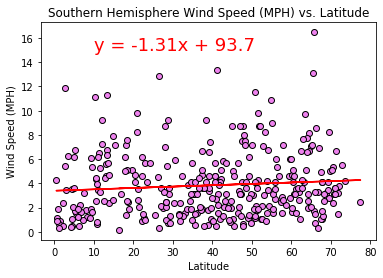

In [98]:
southern_hem_df_wind = southern_hem_df[southern_hem_df['Wind Speed'] <29]
plt.scatter(southern_hem_df_wind["Latitude"],southern_hem_df_wind["Wind Speed"], marker="o", facecolors="violet", edgecolors="black")
plt.title("Southern Hemisphere Wind Speed (MPH) vs. Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem_df["Latitude"], southern_hem_df["Wind Speed"])
regress_values = southern_hem_df["Latitude"] * slope + intercept
plt.plot(southern_hem_df["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=18,color="red")
print(f"The r-squared value is : {rvalue**2}")

The r-squared value is : 0.05617420461950581


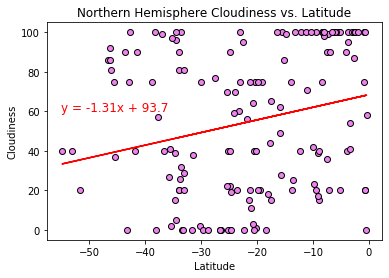

In [67]:
plt.scatter(northern_hem_df["Latitude"],northern_hem_df["Cloudiness"], marker="o", facecolors="violet", edgecolors="black")
plt.title("Northern Hemisphere Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem_df["Latitude"], northern_hem_df["Cloudiness"])
regress_values = northern_hem_df["Latitude"] * slope + intercept
plt.plot(northern_hem_df["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=12,color="red")
print(f"The r-squared value is : {rvalue**2}")

The r-squared value is : 0.0712982349613593


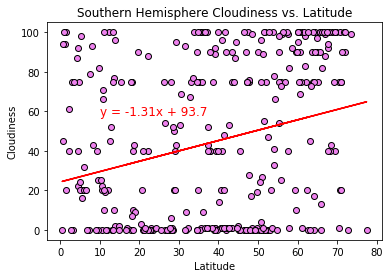

In [69]:
plt.scatter(southern_hem_df["Latitude"],southern_hem_df["Cloudiness"], marker="o", facecolors="violet", edgecolors="black")
plt.title("Southern Hemisphere Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem_df["Latitude"], southern_hem_df["Cloudiness"])
regress_values = southern_hem_df["Latitude"] * slope + intercept
plt.plot(southern_hem_df["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(10,58),fontsize=12,color="red")
print(f"The r-squared value is : {rvalue**2}")

In [70]:
cities_df.to_csv('output_data/cities.csv')